# Predicting Housing Prices
#### Primary Data Source: https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

# Initial Imports

In [235]:
#Basics
import pandas as pd
import numpy as np
from pathlib import Path

# Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# PyViz
import matplotlib.pyplot as plt 
import plotly.express as px
import hvplot.pandas
import seaborn as sns

# Reading in CSVs

In [236]:
# Reading in Population Data
population_path = Path("/Users/devinaamangal/Regression Trials/resources/PopulationEstimates.csv")
population_data = pd.read_csv(population_path, index_col=["Date", "FIPS", "State", "Area_Name"], infer_datetime_format=True)
population_data.head()

Population_Estimate
Date FIPS   State Area_Name                          
2014 1001.0 AL    Autauga County              54893.0
     1003.0 AL    Baldwin County             199183.0
     1005.0 AL    Barbour County              26755.0
     1007.0 AL    Bibb County                 22553.0
     1009.0 AL    Blount County               57526.0

In [237]:
# Reading in Unemployment Data
unemployment_path = Path("/Users/devinaamangal/Regression Trials/resources/Unemployment.csv")
unemployment_data = pd.read_csv(unemployment_path, index_col=["Date", "FIPS", "State", "Area_Name"], infer_datetime_format=True)
unemployment_data.head()

Unemployement
Date FIPS State Area_Name                    
2014 1001 AL    Autauga County            5.8
     1003 AL    Baldwin County            6.1
     1005 AL    Barbour County           10.5
     1007 AL    Bibb County               7.2
     1009 AL    Blount County             6.1

In [238]:
# Reading in Migration Data
migration_path = Path("/Users/devinaamangal/Regression Trials/resources/Net_Migration.csv")
migration_data = pd.read_csv(migration_path, index_col=["Date", "FIPS", "State", "Area_Name"], infer_datetime_format=True)
migration_data.head()

Net_Migration
Date FIPS   State Area_Name                    
2014 1001.0 AL    Autauga County          108.0
     1003.0 AL    Baldwin County         3977.0
     1005.0 AL    Barbour County         -138.0
     1007.0 AL    Bibb County              30.0
     1009.0 AL    Blount County          -118.0

In [239]:
# Reading in Housing Prices Data
housing_path = Path("/Users/devinaamangal/Regression Trials/resources/Housing Prices.csv")
housing_data = pd.read_csv(housing_path, index_col=["Date", "FIPS", "State", "Area_Name"], infer_datetime_format=True)
housing_data.head()

Housing_Prices
Date FIPS   State Area_Name                     
2014 1001.0 AL    Autauga County         22950.0
     1003.0 AL    Baldwin County        108018.0
     1005.0 AL    Barbour County         11923.0
     1007.0 AL    Bibb County             9070.0
     1009.0 AL    Blount County          24056.0

# Concatenate DataFrames

In [241]:
# Joining Data Frames
combined_df = pd.concat([population_data,unemployment_data, migration_data, housing_data], axis='columns')
combined_df.head()

Population_Estimate  Unemployement  \
Date FIPS   State Area_Name                                            
2014 1001.0 AL    Autauga County              54893.0            5.8   
     1003.0 AL    Baldwin County             199183.0            6.1   
     1005.0 AL    Barbour County              26755.0           10.5   
     1007.0 AL    Bibb County                 22553.0            7.2   
     1009.0 AL    Blount County               57526.0            6.1   

                                  Net_Migration  Housing_Prices  
Date FIPS   State Area_Name                                      
2014 1001.0 AL    Autauga County          108.0         22950.0  
     1003.0 AL    Baldwin County         3977.0        108018.0  
     1005.0 AL    Barbour County         -138.0         11923.0  
     1007.0 AL    Bibb County              30.0          9070.0  
     1009.0 AL    Blount County          -118.0         24056.0

#### Data Cleaning

In [242]:
# Check for Null Values
combined_df.isnull().sum()

Population_Estimate    17
Unemployement          23
Net_Migration          17
Housing_Prices         17
dtype: int64

In [243]:
# Drop Null Values
combined_df = combined_df.dropna().copy()
combined_df.head()

Population_Estimate  Unemployement  \
Date FIPS   State Area_Name                                            
2014 1001.0 AL    Autauga County              54893.0            5.8   
     1003.0 AL    Baldwin County             199183.0            6.1   
     1005.0 AL    Barbour County              26755.0           10.5   
     1007.0 AL    Bibb County                 22553.0            7.2   
     1009.0 AL    Blount County               57526.0            6.1   

                                  Net_Migration  Housing_Prices  
Date FIPS   State Area_Name                                      
2014 1001.0 AL    Autauga County          108.0         22950.0  
     1003.0 AL    Baldwin County         3977.0        108018.0  
     1005.0 AL    Barbour County         -138.0         11923.0  
     1007.0 AL    Bibb County              30.0          9070.0  
     1009.0 AL    Blount County          -118.0         24056.0

In [244]:
# Gather information about the DataFrame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18840 entries, (2014, 1001.0, AL, Autauga County) to (2019, 56045.0, WY, Weston County)
Data columns (total 4 columns):
Population_Estimate    18840 non-null float64
Unemployement          18840 non-null float64
Net_Migration          18840 non-null float64
Housing_Prices         18840 non-null float64
dtypes: float64(4)
memory usage: 739.0+ KB


# Graphical Analysis

In [253]:
# Average Prices changes per State
combined_group_1 = combined_df.groupby(['Date','State']).mean()
combined_group_1.head()
price_plot = combined_group_1.hvplot.line(
             x="Date",
             y="Housing_Prices",
             colormap="viridis",
             title="Average price change per state",
        groupby = ["State"]
    )
price_plot

:DynamicMap   [State]
   :Curve   [Date]   (Housing_Prices)

In [254]:
# Top 10 most expensive states to buy homes in
combined_group_2 = combined_df.groupby(['State']).sum()
combined_group_2 = combined_group_2.drop(columns= ["Unemployement", "Population_Estimate", "Net_Migration"])
combined_group_2 = combined_group_2.sort_values('Housing_Prices', ascending=False)
combined_group_2 = combined_group_2.iloc[:10]
combined_group_2.hvplot.bar(label="Top 10 Most Expensive States to Buy Homes")

:Bars   [State]   (Housing_Prices)

In [255]:
# Employment per State
combined_group_3 = combined_df.groupby(['State']).mean()
combined_group_3.head()
employment_plot = combined_group_3.hvplot.bar(
             x="State",
             y="Unemployement",
             colormap="viridis",
             title="Employement Levels per State"
    )
employment_plot

:Bars   [State]   (Unemployement)

In [256]:
# Top 10 most populated States
combined_group_4 = combined_df.groupby(['State']).sum()
combined_group_4 = combined_group_4.drop(columns= ["Unemployement", "Housing_Prices", "Net_Migration"])
combined_group_4 = combined_group_4.sort_values('Population_Estimate', ascending=False)
combined_group_4 = combined_group_4.iloc[:10]
combined_group_4.hvplot.bar(label="Top 10 Most Populated States")

:Bars   [State]   (Population_Estimate)

# Pre-Processing via MinMax Scalar

In [257]:
# Scaling the data
scaler = preprocessing.MinMaxScaler()
names = combined_df.columns
d = scaler.fit_transform(combined_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Population_Estimate,Unemployement,Net_Migration,Housing_Prices
0,0.005423,0.209877,0.559462,0.006397
1,0.019701,0.222222,0.586564,0.030164
2,0.002639,0.403292,0.557739,0.003317
3,0.002223,0.267490,0.558916,0.002520
4,0.005684,0.222222,0.557879,0.006706


In [258]:
# Information about Scaled Data
print(scaled_df.describe())

       Population_Estimate  Unemployement  Net_Migration  Housing_Prices
count         18840.000000   18840.000000   18840.000000    18840.000000
mean              0.010169       0.175643       0.560644        0.012140
std               0.032664       0.082697       0.019461        0.035592
min               0.000000       0.000000       0.000000        0.000000
25%               0.001074       0.119342       0.557865        0.001522
50%               0.002533       0.160494       0.558656        0.003482
75%               0.006685       0.218107       0.559854        0.008769
max               1.000000       1.000000       1.000000        1.000000


# Correlation

In [259]:
correlations = scaled_df.corr(method='pearson')
correlations

,Population_Estimate,Unemployement,Net_Migration,Housing_Prices
Population_Estimate,1.000000,-0.029099,-0.002303,0.993812
Unemployement,-0.029099,1.000000,-0.061175,-0.029266
Net_Migration,-0.002303,-0.061175,1.000000,0.018874
Housing_Prices,0.993812,-0.029266,0.018874,1.000000


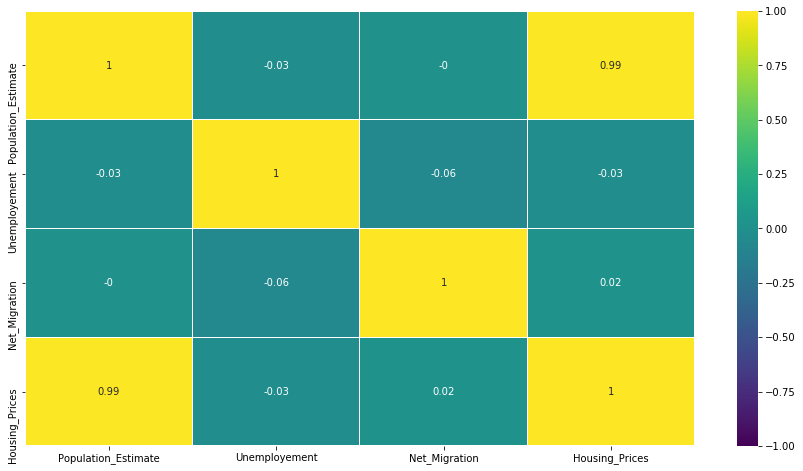

In [260]:
# Correlation Matrix
correlation_matrix = scaled_df.corr().round(2)
plt.figure(figsize=(15,8))
ax = sns.heatmap(data=correlation_matrix, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

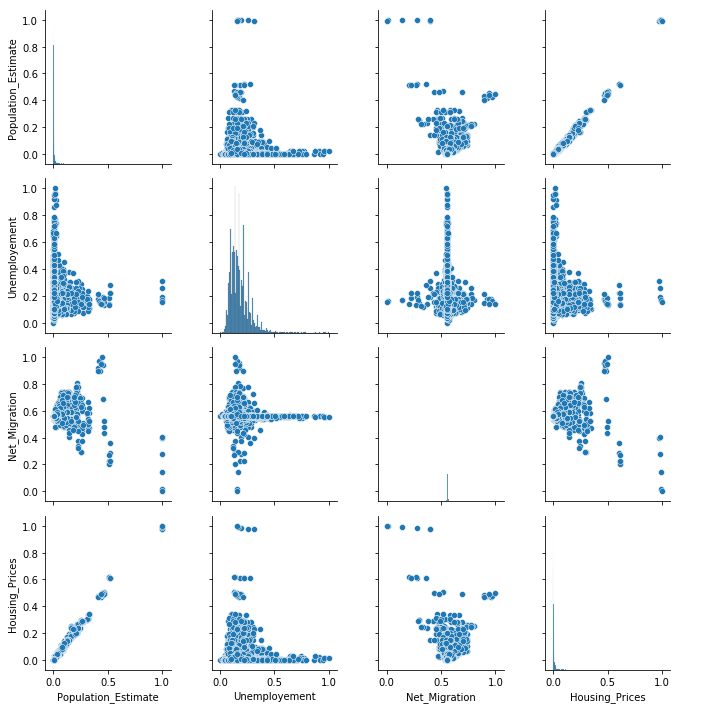

In [163]:
sns.pairplot(scaled_df)

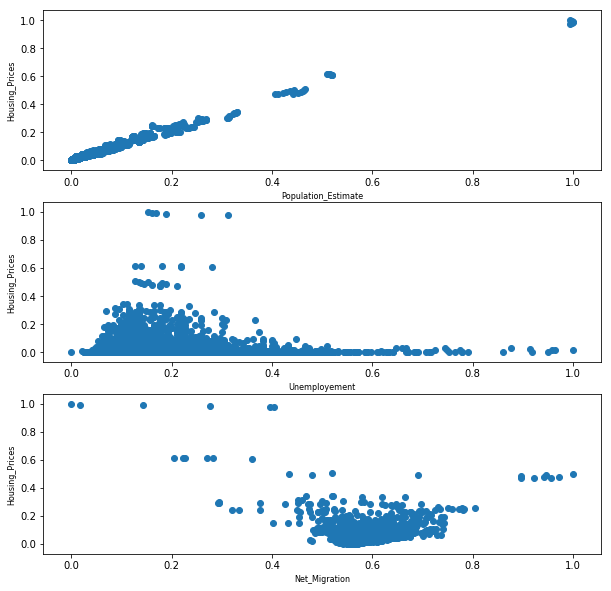

In [164]:
# Plots to understand the relationship between target variable and predictor variables
features = scaled_df.drop('Housing_Prices', 1).columns
target = scaled_df['Housing_Prices']
plt.figure(figsize=(10,10))
for index, feature_name in enumerate(features):
    plt.subplot(3,len(features)/2, index+1)
    plt.scatter(scaled_df[feature_name], target)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('Housing_Prices', fontsize=8)

# Multiple Linear Regression

In [261]:
# Defining the vaiables
y=scaled_df["Housing_Prices"]
x=scaled_df[["Population_Estimate","Unemployement", "Net_Migration"]]

In [262]:
# Data Partitioning
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 465) 

print('Training Data Count: {}'.format(train_x.shape[0]))
print('Testing Data Count: {}'.format(test_x.shape[0]))

Training Data Count: 15072
Testing Data Count: 3768


In [263]:
# Regression
train_x = sm.add_constant(train_x)
results = sm.OLS(train_y, train_x).fit()
results.summary()

/Users/devinaamangal/Desktop/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Housing_Prices   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.253e+05
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:53:19   Log-Likelihood:                 62287.
No. Observations:               15072   AIC:                        -1.246e+05
Df Residuals:                   15068   BIC:                        -1.245e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0194      0.001    -21.567      0.000      -0.021      -0.018
Population_Estimate     1.0810      0.001   1129.049      0.000       1.079       1.083
Unemployement           0.0003      0.000      0.846      0.398      -0.000       0.001
Net_Migration           0.0366      0.002     22.927      0.000       0.033       0.040
==============================================================================
Omnibus:                    12331.684   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13770951.965
Skew:                           2.639   Prob(JB):                         0.00
Kurtosis:                     150.988   Cond. No.                         67.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Fitting the data into Test Data Set

/Users/devinaamangal/Desktop/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


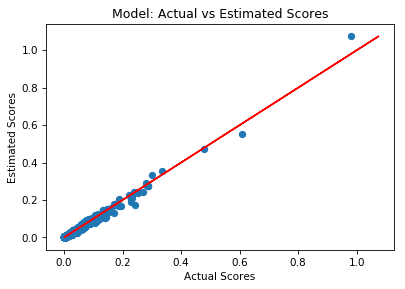

In [264]:
# Fitting Multiple Linear regression model to training model 
test_x = sm.add_constant(test_x)

# Predicting the test set results 
pred_y = results.predict(test_x)

# Plotting the prediction
plt.figure(dpi = 75)
plt.scatter(test_y, pred_y)
plt.plot(pred_y, pred_y, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

# Evaluation Metrics

In [265]:
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

MAE: 0.0014847870854072858
MSE: 1.507173904766074e-05
RMSE: 0.0038822337703519013


# Exporting final CSV

In [232]:
combined_df.to_csv('combined.csv')